In [1]:
# importing project dependencies:

# compute dependency
import numpy as np
# dataframe dependency
import pandas as pd
# visualization dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.express as px
# stats dependency
from scipy import stats
# feature_engineering dependency
import feature_engine
# from scraping some data
import webbrowser


import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install -U imbalanced-learn
!pip install imblearn


In [3]:
!pip install feature-engine

In [4]:
loan=pd.read_csv(r'C:\Users\sandeep\Desktop\kajal\Python Scripts\loan.csv')

In [5]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
loan.shape

(614, 13)

# identify categorical and numerical variable

In [10]:
categorical_cols = [feature for feature in loan.columns if loan[feature].dtypes=='object']
loan[categorical_cols].sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
227,LP001758,Male,Yes,2,Graduate,No,Semiurban,Y
255,LP001846,Female,No,3+,Graduate,No,Rural,Y
466,LP002500,Male,Yes,3+,Not Graduate,No,Urban,N
393,LP002265,Male,Yes,2,Not Graduate,No,Semiurban,Y
530,LP002717,Male,Yes,0,Graduate,No,Rural,Y


In [11]:
numerical_cols = [feature for feature in loan.columns if loan[feature].dtypes!='object']
loan[numerical_cols].sample(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
20,7660,0.0,104.0,360.0,0.0
434,3750,0.0,100.0,360.0,1.0
367,5124,0.0,124.0,NaN,0.0
177,5516,11300.0,495.0,360.0,0.0
232,3189,2598.0,120.0,NaN,1.0


In [12]:
loan.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

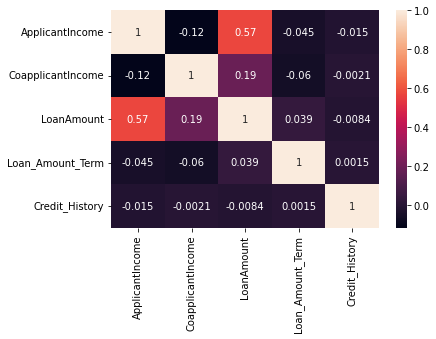

In [13]:
sns.heatmap(loan.corr(),annot=True)

<AxesSubplot:>

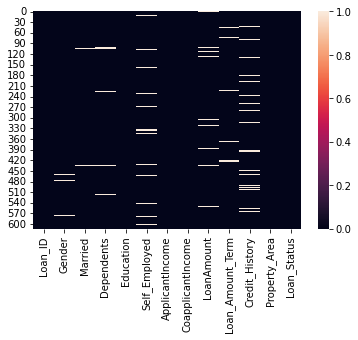

In [14]:
#checking for missing values
sns.heatmap(loan.isna())

In [15]:
loan.isna().mean()

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

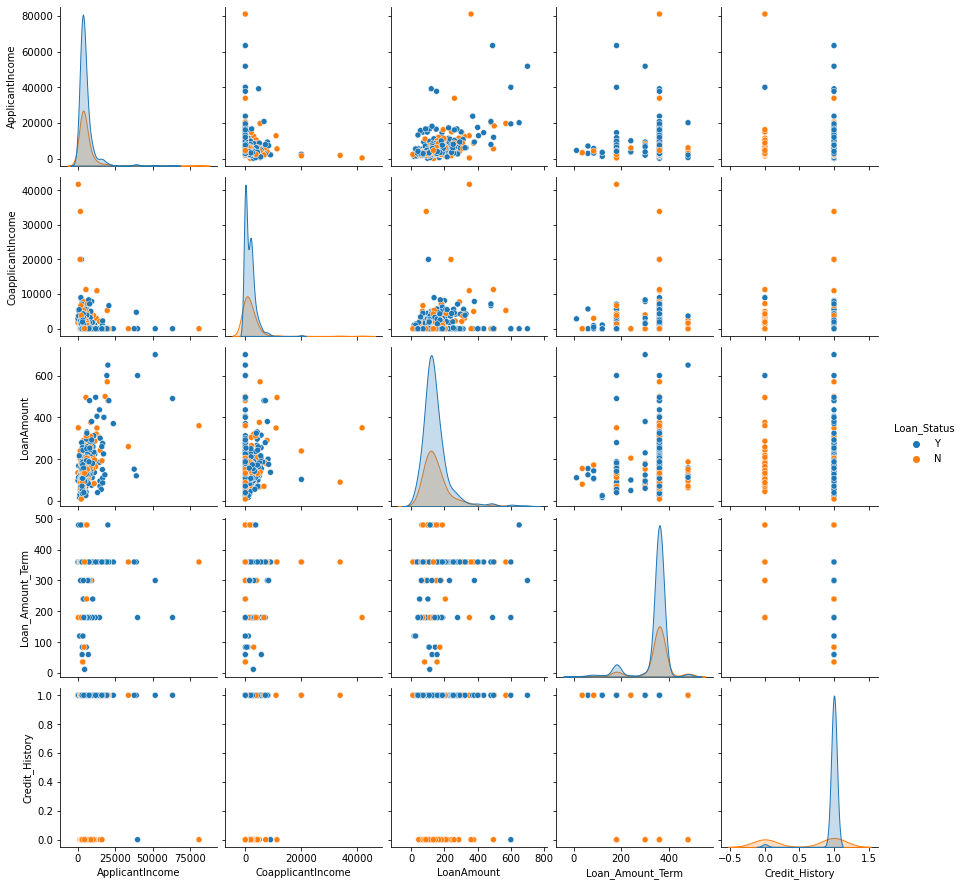

In [16]:
# pairplot of the datasets
sns.pairplot(loan,hue='Loan_Status',diag_kind='kde')

there is positively high skewness

# UNIVARIATE ANALYSIS

In [17]:
# helper function
def fig_this_size(x,y):
    return plt.figure(figsize=(x,y))

In [18]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
#Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

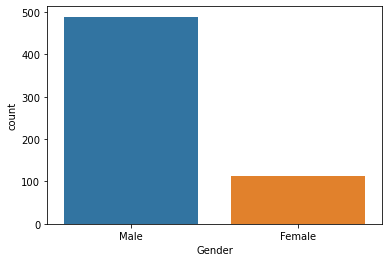

In [20]:
sns.countplot(loan.Gender)

In [21]:
#Married

<AxesSubplot:xlabel='Married', ylabel='count'>

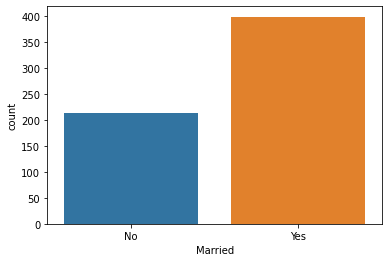

In [22]:
sns.countplot(loan.Married)

In [23]:
#Self-employed

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

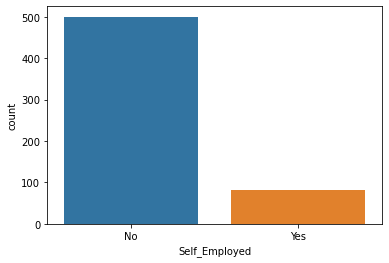

In [24]:
sns.countplot(loan.Self_Employed)

In [25]:
#Dependents

<AxesSubplot:xlabel='Dependents', ylabel='count'>

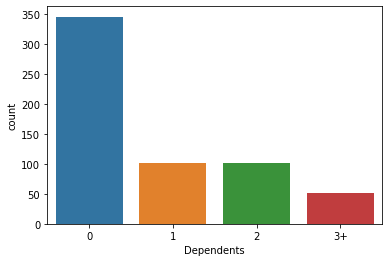

In [26]:
sns.countplot(loan.Dependents)

In [27]:
#Education

<AxesSubplot:xlabel='Education', ylabel='count'>

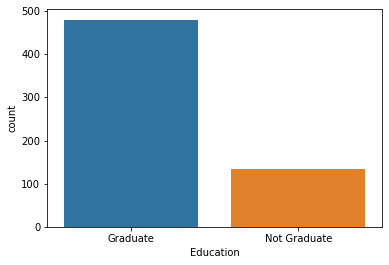

In [28]:
sns.countplot(loan.Education)

# MULTI VARIATE ANALYSIS

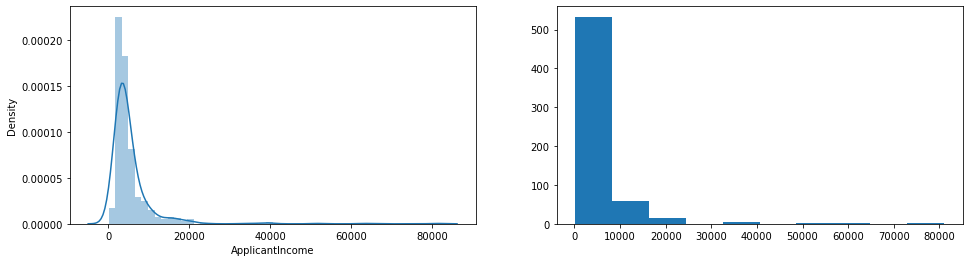

In [29]:
# Applicant Income
fig = fig_this_size(16,4)


fig.add_subplot(121)
sns.distplot(loan.ApplicantIncome)

fig.add_subplot(122)
plt.hist(loan.ApplicantIncome);

<AxesSubplot:xlabel='ApplicantIncome'>

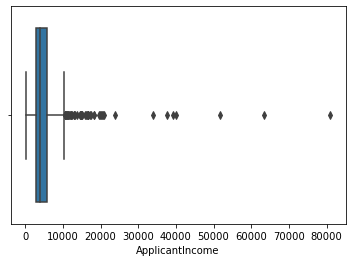

In [30]:
sns.boxplot(loan.ApplicantIncome,orient='v')

In [31]:
loan.ApplicantIncome.value_counts()

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

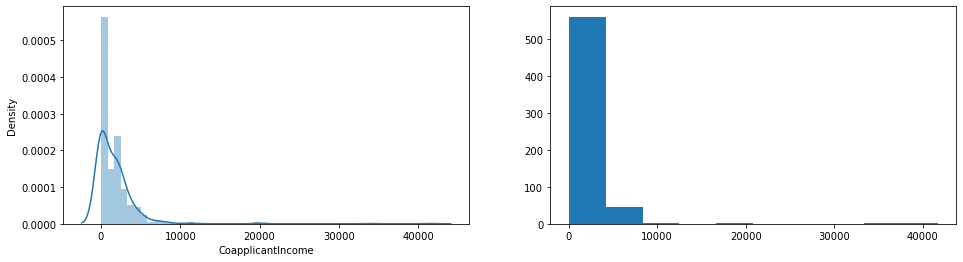

In [32]:
#CoApplicantIncome

fig = fig_this_size(16,4)


fig.add_subplot(121)
sns.distplot(loan.CoapplicantIncome)

fig.add_subplot(122)
plt.hist(loan.CoapplicantIncome);

<AxesSubplot:xlabel='CoapplicantIncome'>

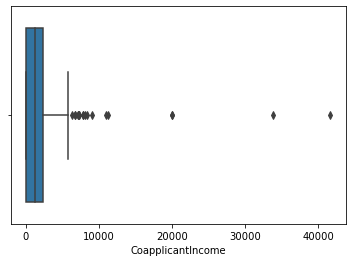

In [33]:
sns.boxplot(loan.CoapplicantIncome,orient='v')

In [34]:
loan.CoapplicantIncome.value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

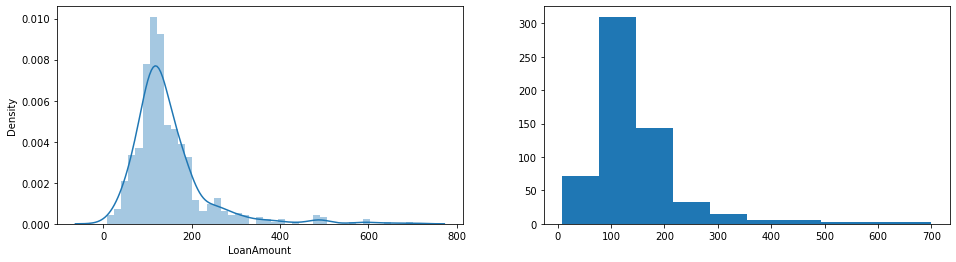

In [35]:
# LoanAmount

#The amount of Loan the Apllicant has applied for (in thousands).
fig = fig_this_size(16,4)

fig.add_subplot(121)
sns.distplot(loan.LoanAmount)

fig.add_subplot(122)
plt.hist(loan.LoanAmount);

In [36]:
loan.dropna().sort_values('LoanAmount',ascending=False)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
561,LP002813,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,Y
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N
487,LP002547,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,N
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,LP002792,Male,Yes,1,Graduate,No,5468,1032.0,26.0,360.0,1.0,Semiurban,Y
94,LP001325,Male,No,0,Not Graduate,No,3620,0.0,25.0,120.0,1.0,Semiurban,Y
133,LP001482,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,120.0,1.0,Semiurban,Y
14,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y


# Loan_Amount_Term
The period to pay back the load amount with interest (in months)
Note: The Loan_AMount_Term is also set by the applicant and not the bank.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

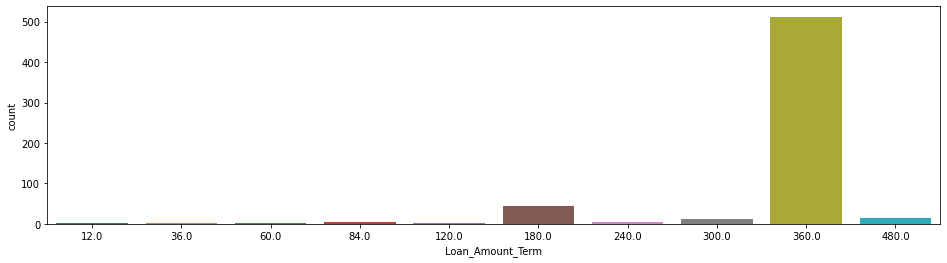

In [37]:
fig_this_size(16,4)
sns.countplot(loan.Loan_Amount_Term)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

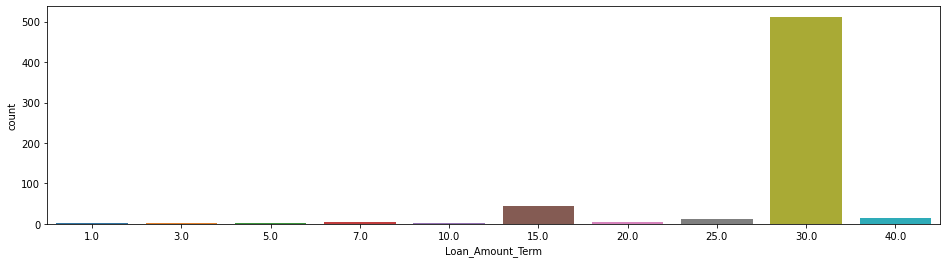

In [38]:
# it's better to visualize it in the years instead of months sometimes.
fig_this_size(16,4)
sns.countplot(loan.Loan_Amount_Term/12)

In [39]:
# Credit_History

Positive or Negative credit history.
  * 1: Positive Credit History.
  * 0: Negative Credit History.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

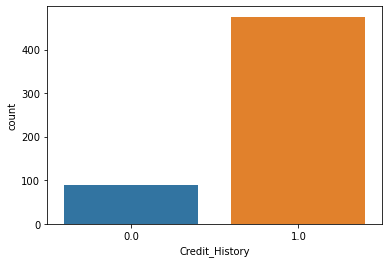

In [40]:
sns.countplot(loan.Credit_History)

In [41]:
pd.DataFrame(np.array(list(zip(loan.Credit_History.value_counts().index.map({0:'Negative(0)',1:'Positive(1)'}),loan.Credit_History.value_counts(),loan.Credit_History.value_counts()/len(loan)*100))),columns=['Credit_History','Applicants','Percentage_of_Applicants']).set_index('Credit_History')

,Applicants,Percentage_of_Applicants
Credit_History,,
Positive(1),475,77.36156351791531
Negative(0),89,14.495114006514658


In [42]:
# applicants with negative credit_history
loan[loan.Credit_History == 0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N
22,LP001047,Male,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban,N
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,LP002872,NaN,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,N
584,LP002911,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N
589,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N


In [43]:
loan[loan.Credit_History == 0]['Loan_Status'].value_counts()/len(loan[loan.Credit_History == 0]) * 100

N    92.134831
Y     7.865169
Name: Loan_Status, dtype: float64

N    92.134831

Y     7.865169

Name: Loan_Status, dtype: float64

As we can see, the people Credit_History = 0(Negative) have very less chance of getting the loan approved by tha bank.
Only 7 percent of the total appicants who applied for the loan got their loan approved.

In [44]:
# lt's look at those 7 percent of guys wih negative credit_history got their loan approved
loan[((loan.Credit_History == 0) & (loan.Loan_Status == 'Y'))]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
201,LP001677,Male,No,2,Graduate,No,4923,0.0,166.0,360.0,0.0,Semiurban,Y
267,LP001882,Male,Yes,3+,Graduate,No,4333,1811.0,160.0,360.0,0.0,Urban,Y
326,LP002068,Male,No,0,Graduate,No,4917,0.0,130.0,360.0,0.0,Rural,Y
453,LP002449,Male,Yes,0,Graduate,No,2483,2466.0,90.0,180.0,0.0,Rural,Y
527,LP002706,Male,Yes,1,Not Graduate,No,5285,1430.0,161.0,360.0,0.0,Semiurban,Y


In [45]:
# property area

In [46]:
loan.Property_Area.value_counts().index[::-1]

Index(['Rural', 'Urban', 'Semiurban'], dtype='object')

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

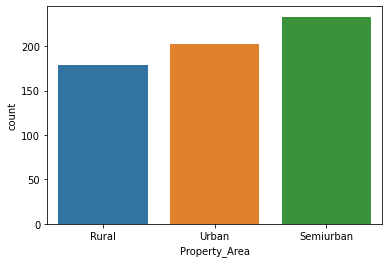

In [47]:
sns.countplot(loan.Property_Area,order=loan.Property_Area.value_counts().index[::-1])

In [48]:
# Loan_Status

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

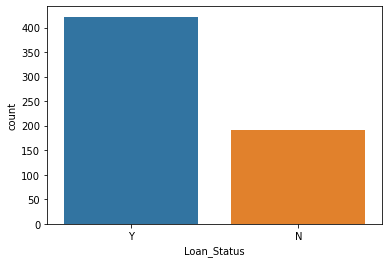

In [49]:
sns.countplot(loan.Loan_Status)

In [50]:
loan.Loan_Status.value_counts()/len(loan) * 100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

# Multi-variate Analysis

In [51]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


(0.0, 25000.0)

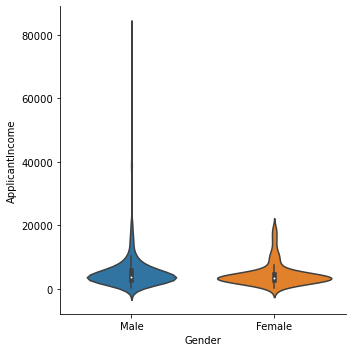

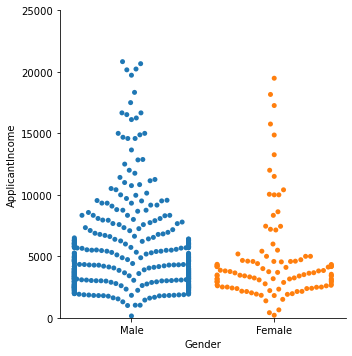

In [52]:
sns.catplot('Gender','ApplicantIncome',data=loan,kind='violin')

sns.catplot('Gender','ApplicantIncome',data=loan,kind='swarm')
plt.ylim([0,25000])

<Figure size 1080x1080 with 0 Axes>

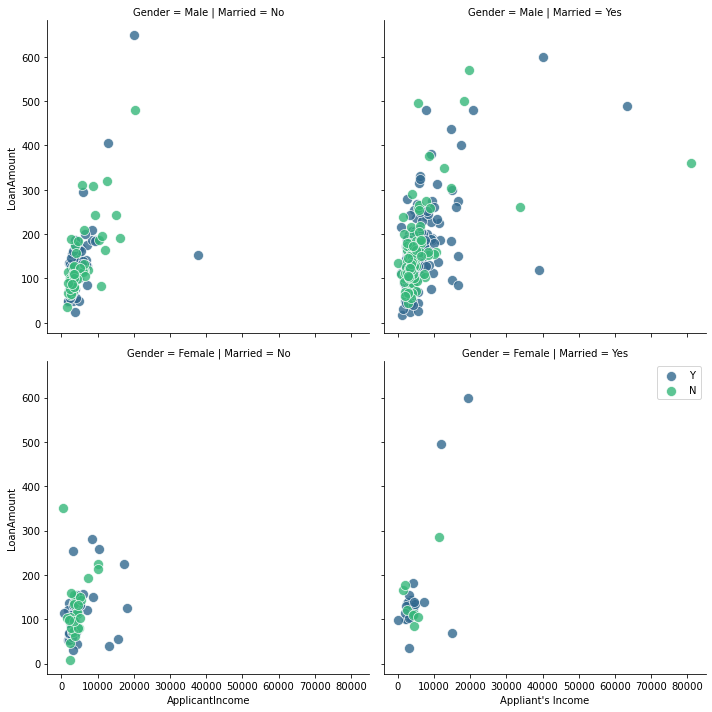

In [53]:
fig_this_size(15,15)
g = sns.FacetGrid(loan, col="Married",  row="Gender",hue='Loan_Status',height=5,palette='viridis')

g.map_dataframe(sns.scatterplot, x="ApplicantIncome",y = 'LoanAmount',s=100,alpha=0.8)
plt.legend()
plt.xlabel("Appliant's Income")
plt.ylabel('Applied Loan Amount')
plt.tight_layout()

<AxesSubplot:xlabel='Dependents', ylabel='count'>

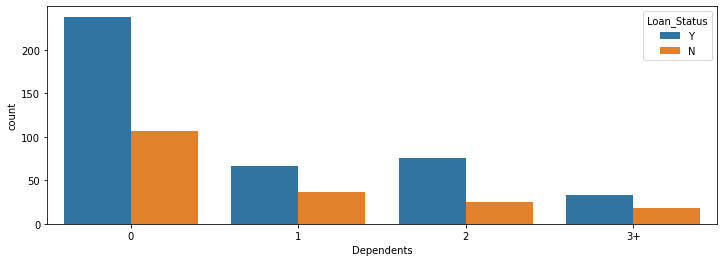

In [54]:
# dependents vs Loan_Status
fig_this_size(12,4)
sns.countplot(loan.Dependents,hue=loan.Loan_Status)

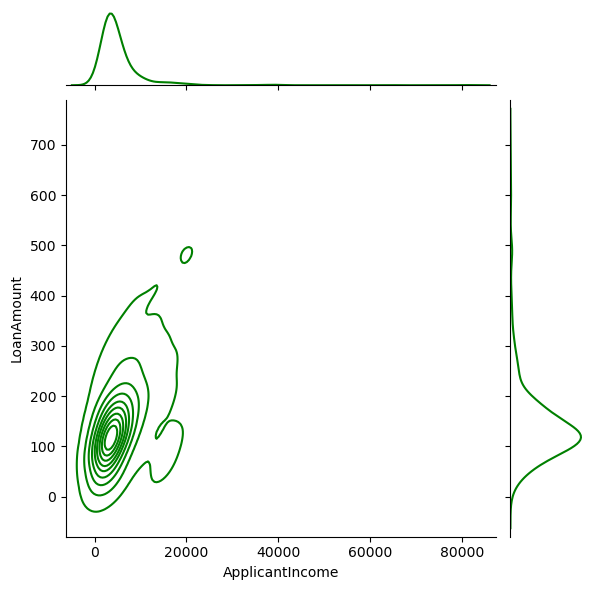

In [55]:
# joinplot
plt.style.use('default')
sns.jointplot(loan.ApplicantIncome,loan.LoanAmount,kind='kde',color='green')

<AxesSubplot:xlabel='Property_Area', ylabel='ApplicantIncome'>

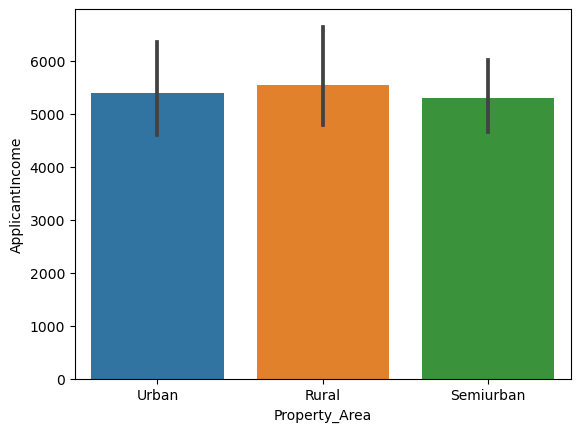

In [56]:
sns.barplot(loan.Property_Area,loan.ApplicantIncome)

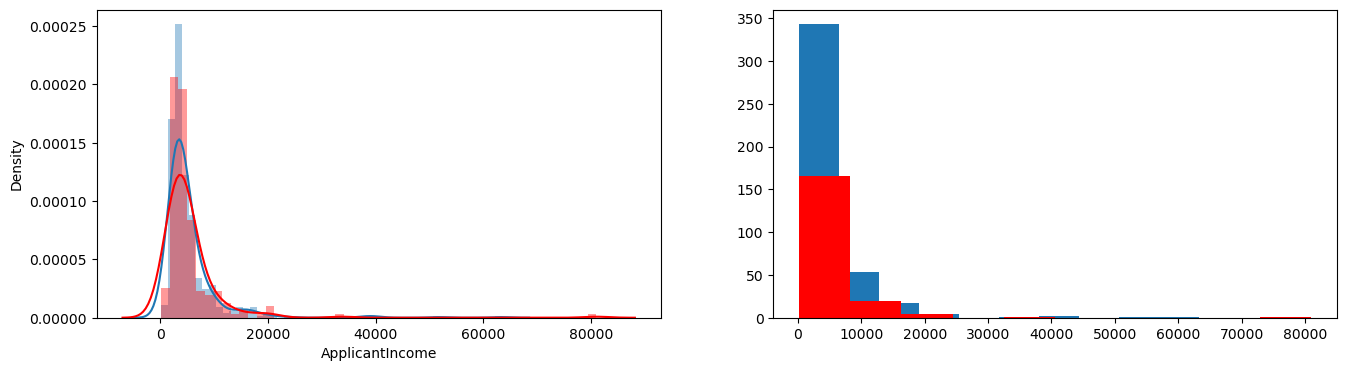

In [57]:
# income with creadit history
fig = fig_this_size(16,4)

fig.add_subplot(121)
sns.distplot(loan[loan.Loan_Status == 'Y'].ApplicantIncome)
sns.distplot(loan[loan.Loan_Status == 'N'].ApplicantIncome,color='red')

fig.add_subplot(122)
plt.hist(loan[loan.Loan_Status == 'Y'].ApplicantIncome)
plt.hist(loan[loan.Loan_Status == 'N'].ApplicantIncome,color='red');


# Adressing the missing values

In [58]:
# checking missing values

missing = {}
for i in loan.columns:
    if loan[i].isnull().sum():
        missing[i] = loan[i].isnull().sum()
print(missing)

{'Gender': 13, 'Married': 3, 'Dependents': 15, 'Self_Employed': 32, 'LoanAmount': 22, 'Loan_Amount_Term': 14, 'Credit_History': 50}


In [59]:
loan.isnull().sum()/len(loan)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [60]:
loan["Gender"] = loan["Gender"].fillna(loan["Gender"].mode()[0])
loan["Married"] = loan["Married"].fillna(loan["Married"].mode()[0])
loan["Dependents"] = loan["Dependents"].fillna(loan["Dependents"].mode()[0])
loan["Self_Employed"] = loan["Self_Employed"].fillna(loan["Self_Employed"].mode()[0])
loan["LoanAmount"] = loan["LoanAmount"].fillna(loan["LoanAmount"].median())
loan["Loan_Amount_Term"] = loan["Loan_Amount_Term"].fillna(loan["Loan_Amount_Term"].median())

In [61]:
loan.groupby(["Loan_Status","Credit_History"])["Loan_Status"].count()

Loan_Status  Credit_History
N            0.0                82
             1.0                97
Y            0.0                 7
             1.0               378
Name: Loan_Status, dtype: int64

In [62]:
def impute_credit_history(x):
    credit = x[0]
    Loan_Status = x[1]
    
    if pd.isnull(credit):
        if Loan_Status =="Y":
            return 1
        elif Loan_Status =="N":
            return 0
    else:
        return credit

In [63]:
loan["Credit_History"] = loan[["Credit_History","Loan_Status"]].apply(impute_credit_history,axis =1) 

In [64]:
missing = {}
for i in loan.columns:
    if loan[i].isnull().sum():
        missing[i] = loan[i].isnull().sum()
print(missing)

{}


In [65]:
num_col = loan.select_dtypes(exclude = "object")

In [66]:
num_col.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [67]:
def numeric_col_graph(x,variable):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    sns.distplot(x[variable])
    
    plt.subplot(122)
    sns.boxplot(x[variable])
    plt.show();

In [68]:
def outlier_treatment(x,variable):
    Q1 = x[variable].quantile(.25)
    Q3 = x[variable].quantile(.75)
    
    IQR = Q3-Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    x[variable] = np.where(x[variable]> upper_bound,upper_bound , np.where(x[variable] < lower_bound,lower_bound, x[variable]))

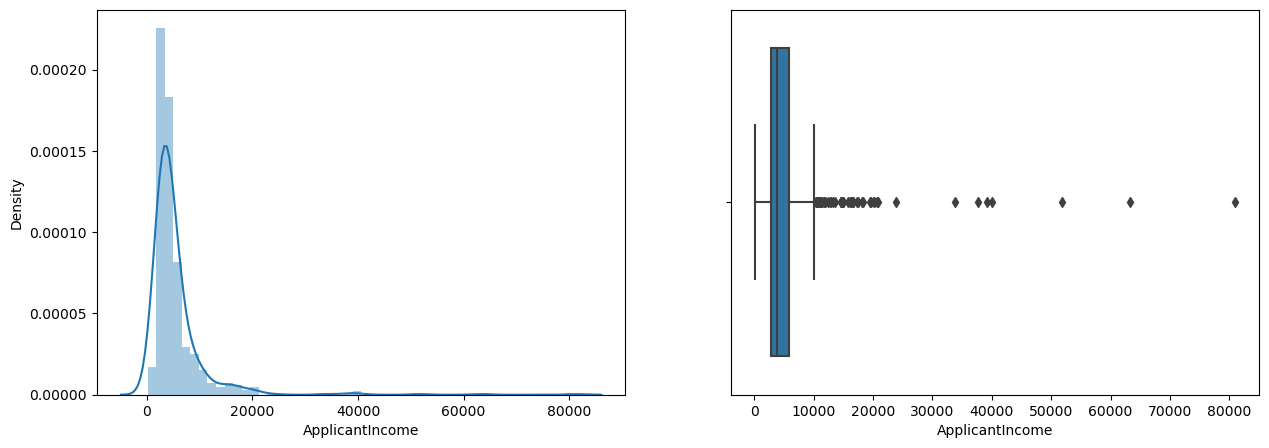

In [69]:
numeric_col_graph(loan,"ApplicantIncome")

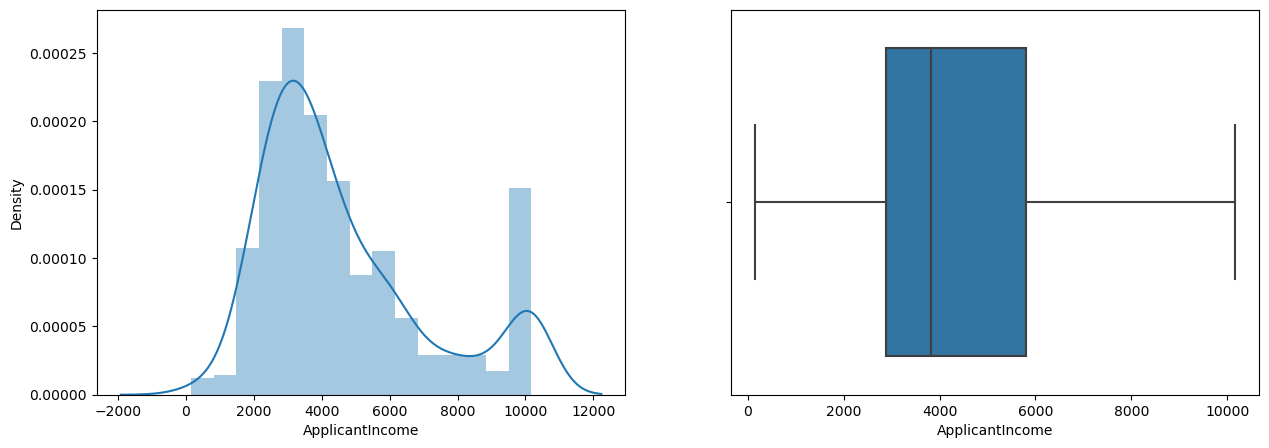

In [70]:
outlier_treatment(loan,"ApplicantIncome")
numeric_col_graph(loan,"ApplicantIncome")

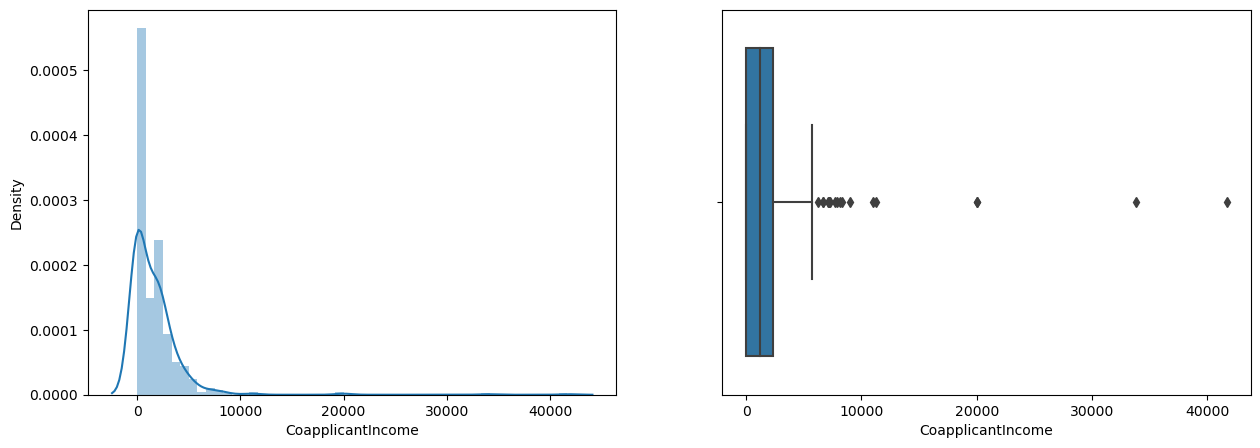

In [71]:
numeric_col_graph(loan,"CoapplicantIncome")

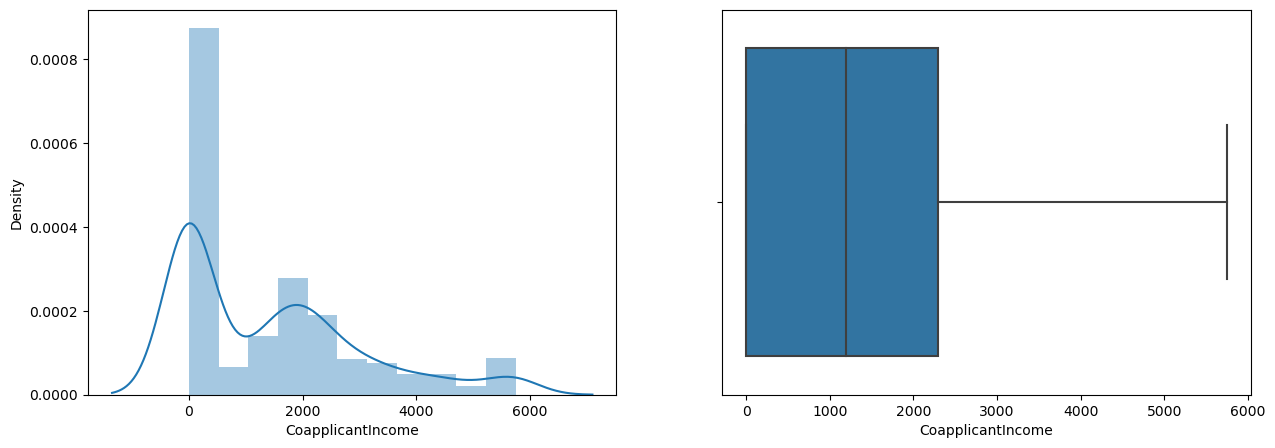

In [72]:
outlier_treatment(loan,"CoapplicantIncome")
numeric_col_graph(loan,"CoapplicantIncome")

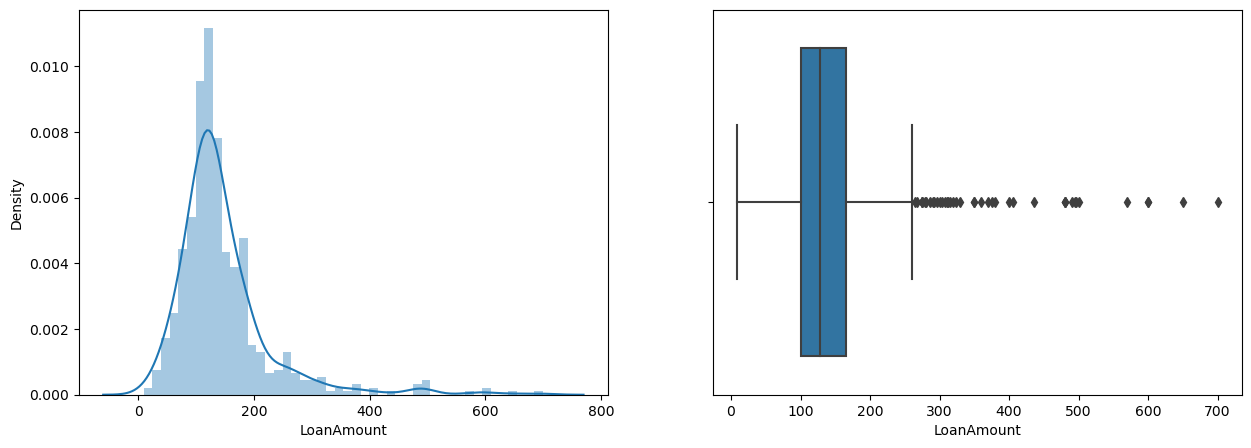

In [73]:
numeric_col_graph(loan,"LoanAmount")


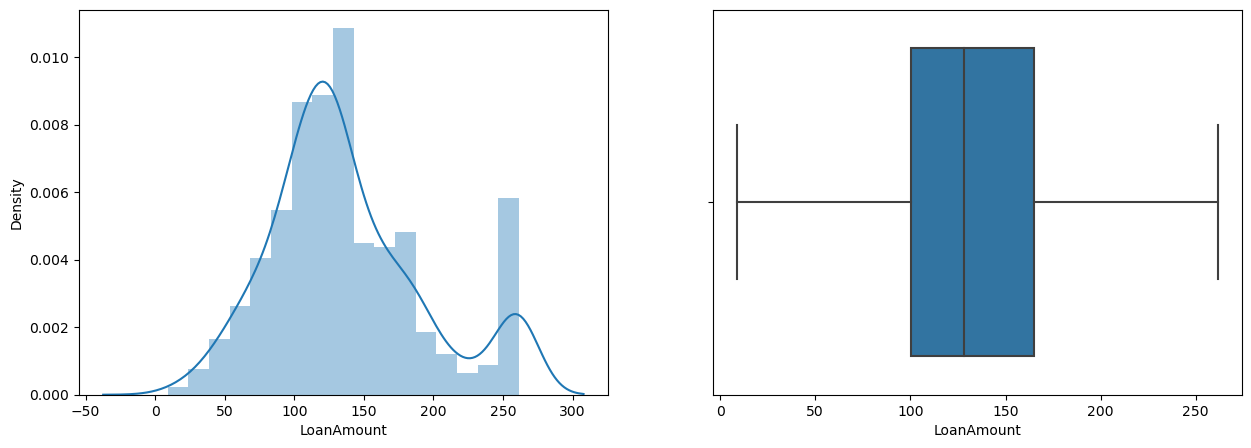

In [74]:
outlier_treatment(loan,"LoanAmount")
numeric_col_graph(loan,"LoanAmount")

In [75]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [76]:
loan.select_dtypes(exclude = "object").skew()

ApplicantIncome      1.039846
CoapplicantIncome    1.012763
LoanAmount           0.683693
Loan_Amount_Term    -2.402112
Credit_History      -1.798506
dtype: float64

In [77]:
# Correcitng the  skewness from the dataset
loan["ApplicantIncome"] = np.sqrt(loan["ApplicantIncome"])
loan["CoapplicantIncome"] = np.sqrt(loan["CoapplicantIncome"]) 
loan["LoanAmount"] = np.sqrt(loan["LoanAmount"])
loan.select_dtypes(exclude = "object").skew()

ApplicantIncome      0.540741
CoapplicantIncome    0.192830
LoanAmount           0.064140
Loan_Amount_Term    -2.402112
Credit_History      -1.798506
dtype: float64

# LABEL ENCODER

In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

loan["Gender"] = le.fit_transform(loan["Gender"])
loan["Married"] = le.fit_transform(loan["Married"])
loan["Education"] = le.fit_transform(loan["Education"])
loan["Property_Area"] = le.fit_transform(loan["Property_Area"])
loan["Self_Employed"] = le.fit_transform(loan["Self_Employed"])

# we have replace Y wtih 1 and N with 0

loan["Loan_Status"].replace({"Y":1,"N":0}, inplace = True) 

In [79]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,76.478755,0.000000,11.313708,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,67.697858,38.832976,11.313708,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,54.772256,0.000000,8.124038,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,50.823223,48.559242,10.954451,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,77.459667,0.000000,11.874342,360.0,1.0,2,1


In [80]:
loan["Dependents"] = loan["Dependents"].map(lambda x:x.rstrip("+")) # removing + sign from dependant column
#Deleting Loan_ID because it is not adding any value to target columns

loan.drop("Loan_ID",axis =1,inplace = True)

# Seprateing Predictor from target variable

In [81]:
X = loan.drop("Loan_Status",axis = 1)
y = loan["Loan_Status"]

In [82]:
# train _test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.22,random_state = 42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((478, 11), (478,), (136, 11), (136,))

In [83]:
# applying standard scaling to the dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score,mean_squared_error

In [85]:
# let's create a helper function to give us the r2 score and mse score in return
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    print('MSE:',mean_squared_error(y_test,y_preds))
    print('R2_Score',r2_score(y_test,y_preds))
    print("Confusion_matrix","\n",confusion_matrix(y_test,y_preds))
    print("classification_report","\n",classification_report(y_test,y_preds))

In [86]:
#  Linear Regression
train_n_ret_scores(LogisticRegression())

MSE: 0.18382352941176472
R2_Score 0.19507575757575746
Confusion_matrix 
 [[25 23]
 [ 2 86]]
classification_report 
               precision    recall  f1-score   support

           0       0.93      0.52      0.67        48
           1       0.79      0.98      0.87        88

    accuracy                           0.82       136
   macro avg       0.86      0.75      0.77       136
weighted avg       0.84      0.82      0.80       136



In [87]:
#  DecisionTreeClassifier
train_n_ret_scores(DecisionTreeClassifier())

MSE: 0.25735294117647056
R2_Score -0.12689393939393945
Confusion_matrix 
 [[29 19]
 [16 72]]
classification_report 
               precision    recall  f1-score   support

           0       0.64      0.60      0.62        48
           1       0.79      0.82      0.80        88

    accuracy                           0.74       136
   macro avg       0.72      0.71      0.71       136
weighted avg       0.74      0.74      0.74       136



In [88]:
#   RandomForestClassifier
train_n_ret_scores( RandomForestClassifier())

MSE: 0.20588235294117646
R2_Score 0.0984848484848484
Confusion_matrix 
 [[25 23]
 [ 5 83]]
classification_report 
               precision    recall  f1-score   support

           0       0.83      0.52      0.64        48
           1       0.78      0.94      0.86        88

    accuracy                           0.79       136
   macro avg       0.81      0.73      0.75       136
weighted avg       0.80      0.79      0.78       136



In [89]:
#AdaBoostClassifier
train_n_ret_scores(AdaBoostClassifier())

MSE: 0.20588235294117646
R2_Score 0.0984848484848484
Confusion_matrix 
 [[25 23]
 [ 5 83]]
classification_report 
               precision    recall  f1-score   support

           0       0.83      0.52      0.64        48
           1       0.78      0.94      0.86        88

    accuracy                           0.79       136
   macro avg       0.81      0.73      0.75       136
weighted avg       0.80      0.79      0.78       136



In [90]:
#KNeighborsClassifier
train_n_ret_scores(KNeighborsClassifier())

MSE: 0.19852941176470587
R2_Score 0.13068181818181812
Confusion_matrix 
 [[25 23]
 [ 4 84]]
classification_report 
               precision    recall  f1-score   support

           0       0.86      0.52      0.65        48
           1       0.79      0.95      0.86        88

    accuracy                           0.80       136
   macro avg       0.82      0.74      0.76       136
weighted avg       0.81      0.80      0.79       136



In [91]:
#SVC
train_n_ret_scores(SVC())

MSE: 0.18382352941176472
R2_Score 0.19507575757575746
Confusion_matrix 
 [[25 23]
 [ 2 86]]
classification_report 
               precision    recall  f1-score   support

           0       0.93      0.52      0.67        48
           1       0.79      0.98      0.87        88

    accuracy                           0.82       136
   macro avg       0.86      0.75      0.77       136
weighted avg       0.84      0.82      0.80       136



In [102]:
RF  = RandomForestClassifier()
parameter = {"n_estimators":[100,200,300],
            "criterion" : ["gini", "entropy"],
            "max_depth":[2,3,4,5],
            "max_features" : ["auto", "sqrt", "log2"]}

grid_score = RandomizedSearchCV(RF,parameter,scoring = "f1",cv = 5,verbose = 2, n_jobs=-1,random_state = 1)
grid_score.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 200, 300]},
                   random_state=1, scoring='f1', verbose=2)

In [103]:
print(grid_score.best_params_)

{'n_estimators': 100, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'gini'}


In [107]:
best_model=RandomForestClassifier()
train_n_ret_scores(RandomForestClassifier())


MSE: 0.20588235294117646
R2_Score 0.0984848484848484
Confusion_matrix 
 [[25 23]
 [ 5 83]]
classification_report 
               precision    recall  f1-score   support

           0       0.83      0.52      0.64        48
           1       0.78      0.94      0.86        88

    accuracy                           0.79       136
   macro avg       0.81      0.73      0.75       136
weighted avg       0.80      0.79      0.78       136



In [108]:
import joblib
import pickle
joblib.dump(best_model,"loan.pkl")

['loan.pkl']